In [ ]:
# Description : This is a sentimental analysis program that parses the tweet fetched from twitter.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy 

In [ ]:
import tweepy #an easy to use pyhton library for acessing the twitter api
from textblob import TextBlob #TextBlob is an open-source Python library that is very easy to use for processing text data.. It offers many built-in methods for common natural language processing tasks
from wordcloud import WordCloud #A word cloud is a visually prominent presentation of “keywords” that appear frequently in text data. The rendering of keywords forms a cloud-like color picture, so that you can appreciate the main text data at a glance.
import re # regular expression


In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv


In [ ]:
#get the data
test = pd.read_csv("test.csv")

In [ ]:
test = test.head(200)


In [ ]:
test.shape

(200, 2)

In [ ]:
df = test.drop(columns= ['id']) # just drop the id column of the dataframe

In [ ]:
df



,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."
...,...
195,can #lighttherapy help with or #depression? ...
196,aww yeah it's all good bing bong bing bong
197,selfie srelfie! #smile #me #selfie #followme...
198,how vera rubin overcame and invented a whole ...


In [ ]:
df['tweet']

0      #studiolife #aislife #requires #passion #dedic...
1       @user #white #supremacists want everyone to s...
2      safe ways to heal your #acne!!    #altwaystohe...
3      is the hp and the cursed child book up for res...
4        3rd #bihday to my amazing, hilarious #nephew...
                             ...                        
195    can #lighttherapy help with   or #depression? ...
196        aww yeah it's all good bing bong bing bong   
197    selfie srelfie! #smile   #me #selfie #followme...
198    how vera rubin overcame  and invented a whole ...
199     @user .@user @user @user @user so sorry to re...
Name: tweet, Length: 200, dtype: object

In [ ]:
#clean the text beacuse the text contain lot of data like @,#,links and all.
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #removed @mentions
  text = re.sub(r'#','',text) #removing the '#' symbol
  text = re.sub(r'RT[\s]+','',text)  #removing RT 
  text = re.sub(r'https?:\/\/\S','',text) #remove the hyperlink    

  return text
  





In [ ]:
df['tweet'] = df['tweet'].map(cleanTxt) #cleaning the text

In [ ]:
df['tweet'] # cleaned text

0      studiolife aislife requires passion dedication...
1        white supremacists want everyone to see the ...
2      safe ways to heal your acne!!    altwaystoheal...
3      is the hp and the cursed child book up for res...
4        3rd bihday to my amazing, hilarious nephew e...
                             ...                        
195    can lighttherapy help with   or depression?   ...
196        aww yeah it's all good bing bong bing bong   
197    selfie srelfie! smile   me selfie followme f4f...
198    how vera rubin overcame  and invented a whole ...
199      .    so sorry to read this after so much pain  
Name: tweet, Length: 200, dtype: object

 polar emotions (positive, negative, neutral)TextBlob performs different operations on textual data such as noun phrase extraction, sentiment analysis, classification, translation, etc.Polarity is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment.

Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual.



In [ ]:
# create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
# create a function to get the polarity
def getPolarity(text)  :
  return TextBlob(text).sentiment.polarity


In [ ]:
#create two new columns
df['Subjectivity'] = df['tweet'].map(getSubjectivity)

In [ ]:
df['Polarity'] = df['tweet'].map(getPolarity)

In [ ]:
df

,tweet,Subjectivity,Polarity
0,studiolife aislife requires passion dedication...,0.000000,0.000000
1,white supremacists want everyone to see the ...,0.227273,0.068182
2,safe ways to heal your acne!! altwaystoheal...,0.500000,0.781250
3,is the hp and the cursed child book up for res...,1.000000,0.500000
4,"3rd bihday to my amazing, hilarious nephew e...",0.633333,0.408333
...,...,...,...
195,can lighttherapy help with or depression? ...,0.750000,0.750000
196,aww yeah it's all good bing bong bing bong,0.750000,0.500000
197,selfie srelfie! smile me selfie followme f4f...,0.100000,0.300000
198,how vera rubin overcame and invented a whole ...,0.400000,0.200000


In [ ]:
#Plot the wordcloud
allword = ''.join([twts for twts in df['tweet']])


In [ ]:
print(allword)

studiolife aislife requires passion dedication willpower   to find newmaterialsâ¦   white supremacists want everyone to see the new â  birdsâ movie â and hereâs why  safe ways to heal your acne!!    altwaystoheal healthy   healing!! is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   harrypotter pottermore favorite  3rd bihday to my amazing, hilarious nephew eli ahmir! uncle dave loves you and missesâ¦ choose to be   :) momtips something inside me dies ð¦ð¿â¨  eyes ness smokeyeyes tired  lonely sof grungeâ¦ finishedtattooinkedinkloveitâ¤ï¸ â¤ï¸â¤ï¸â¤ï¸â¤ï¸ thanksaleeee !!!     i will never understand why my dad left me when i was so young.... :/ deep inthefeels  delicious   food lovelife capetown mannaepicure resturantâ¦ 1000dayswasted - narcosis infinite ep.. make me aware.. grinding neuro bass lifestyle   one of the world's greatest spoing events   lemans24 teamaudi  half way through the website now an

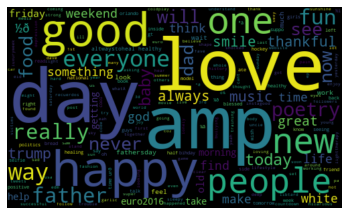

In [ ]:
from pandas.core.common import random_state
wordCloud = WordCloud(width =500, height =300 , random_state= 21 , max_font_size =110).generate(allword)
plt.imshow( wordCloud , interpolation = 'bilinear') # It is usually applied to functions sampled on a 2D rectilinear grid(bilinear interpolation)
plt.axis('off')
plt.show(wordCloud)



In [ ]:
#now we create a function to get negative positive or neutral analysis
def getanalysis(score):
  if score < 0:
    return 'negative'
  elif score ==0:
    return 'neutral'
  elif score > 0:
    return 'positive'  


In [ ]:
df['Analysis'] = df['Polarity'].map(getanalysis)

In [ ]:
df # show the dataframe

,tweet,Subjectivity,Polarity,Analysis
0,studiolife aislife requires passion dedication...,0.000000,0.000000,neutral
1,white supremacists want everyone to see the ...,0.227273,0.068182,positive
2,safe ways to heal your acne!! altwaystoheal...,0.500000,0.781250,positive
3,is the hp and the cursed child book up for res...,1.000000,0.500000,positive
4,"3rd bihday to my amazing, hilarious nephew e...",0.633333,0.408333,positive
...,...,...,...,...
195,can lighttherapy help with or depression? ...,0.750000,0.750000,positive
196,aww yeah it's all good bing bong bing bong,0.750000,0.500000,positive
197,selfie srelfie! smile me selfie followme f4f...,0.100000,0.300000,positive
198,how vera rubin overcame and invented a whole ...,0.400000,0.200000,positive


In [ ]:
#let print all the positivr tweets
sorteddf=df.sort_values(by=['Polarity'])
j=1
for i in range(0,len(sorteddf)):
  if (sorteddf['Analysis'][i]=='positive'):
    print(str(j)+')'+sorteddf['tweet'][i])
    print()
    j=j+1


1)  white supremacists want everyone to see the new â  birdsâ movie â and hereâs why  

2)safe ways to heal your acne!!    altwaystoheal healthy   healing!! 

3)is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   harrypotter pottermore favorite

4)  3rd bihday to my amazing, hilarious nephew eli ahmir! uncle dave loves you and missesâ¦ 

5)choose to be   :) momtips 

6)delicious   food lovelife capetown mannaepicure resturantâ¦ 

7)1000dayswasted - narcosis infinite ep.. make me aware.. grinding neuro bass lifestyle   

8)one of the world's greatest spoing events   lemans24 teamaudi  

9)half way through the website now and allgoingwell very  

10)good food, good life , enjoy and   ðððððð this is called ~garlic bread~ ... iloveitâ¦ 

11)&amp; love &amp; hugs &amp; kisses too! how to keep your baby     parenting healthcare

12)thought factory: bbc neutrality on right wing fascism  politics media blm bre

In [ ]:
#let print the negative tweets
sortedDF = df.sort_values(by=['Polarity'],ascending = False)
for i in range(0,len(sortedDF)):
  if (sortedDF['Analysis'][i]== 'negative'):
    print(str(j)+')'+sortedDF['tweet'][i])
    j=j+1
    

   


109)something inside me dies ð¦ð¿â¨  eyes ness smokeyeyes tired  lonely sof grungeâ¦ 
110)    i will never understand why my dad left me when i was so young.... :/ deep inthefeels  
111)i'll stand behind this guncontrolplease   senselessshootings taketheguns comicrelief stillsad 
112)  got my  limited edition rain or shine set today!!  !     
113)never been this down on myself in my entire life.  
114) chick gets fucked hottest naked lady 
115)i'll never be 120 again i'm   i'm a thick women blacktina
116)orangechicken   attack bull game 3d: do you really think that his head was empty around the city. each side 
117)my granddaughter's 1st bihday is tomorrow.  going to pick her play house, little car, &amp; pool today.   ððððððð
118)  6 chapters left of my book &amp; then it's nearly complete kruella adaughterstale it will be a hard read emotional funnyâ¦
119)trying out another way to make sourdough bread, this one may be underproofed   failed baking 
120) .  

Text(0, 0.5, 'Subjectivity')

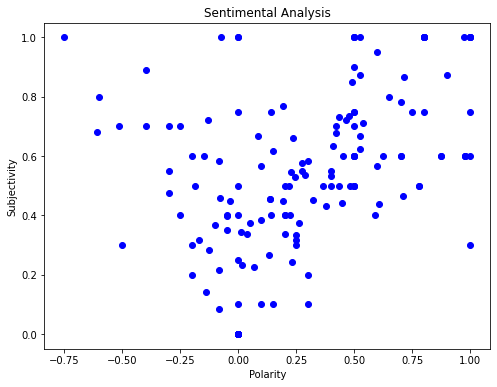

In [ ]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,len(df)):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='blue')
plt.title('Sentimental Analysis')  
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
#get the percentage of positive tweet
ptweet = df[df.Analysis=='positive']
print((len(ptweet)/len(df))*100)

54.0


In [ ]:
#get the percentage of negative tweet
ntweet = df[df.Analysis=='negative']
print((len(ntweet)/len(df))*100)

15.5


In [ ]:
#get the percentage of neutral tweet
ntweet = df[df.Analysis=='neutral']
print((len(ntweet)/len(df))*100)

30.5


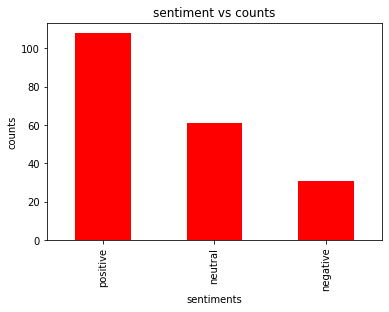

In [ ]:
df['Analysis'].value_counts() # count number of positive negative and neutral values

df['Analysis'].value_counts().plot( kind ='bar',color= 'red')
plt.xlabel("sentiments")
plt.ylabel("counts")
plt.title("sentiment vs counts")
plt.show()
 